## Loading Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import requests
import datetime
import pytz
import mplfinance as mpf

## Getting Data

In [2]:
df = pd.read_pickle('C:/github/Hmisc/FinanceLab-ass1/final_task_bad_data.pickle')

## Viewing data

In [6]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-17 00:00:00-05:00,154.187493,154.855315,152.114248,152.453140,8110300.0
2022-02-18 00:00:00-05:00,152.413269,153.180757,149.562559,150.868301,10785500.0
2022-02-22 00:00:00-05:00,149.702101,150.300143,147.130481,147.608917,12227200.0
2022-02-23 00:00:00-05:00,149.014346,149.253572,145.027340,145.396133,9300700.0
2022-02-24 00:00:00-05:00,139.545215,149.084134,139.545215,148.914673,12475500.0


In [7]:
print(df.shape)

(502, 5)


In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,502.000000,502.000000,502.000000,502.000000,5.010000e+02
mean,99.826219,101.003504,98.613673,138.813084,1.290093e+07
std,15.033235,15.250139,14.678095,624.452058,7.460270e+06
min,78.843041,79.530799,78.474245,-20.000000,5.426100e+06
25%,90.092497,90.995822,89.343816,90.181091,8.900900e+06
50%,96.002118,97.361360,94.801034,95.757915,1.125760e+07
75%,106.378302,107.644175,104.501919,106.261181,1.420600e+07
max,154.187493,154.855315,152.114248,9999.000000,7.027350e+07


In [10]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [9]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64

In [83]:
date_diffs = df.index.to_series().diff()
threshold = pd.Timedelta(days=3)
unusual_skips = date_diffs[date_diffs > threshold]

print(unusual_skips)


Date
2022-02-22 00:00:00-05:00   4 days 00:00:00
2022-04-18 00:00:00-04:00   4 days 00:00:00
2022-05-31 00:00:00-04:00   4 days 00:00:00
2022-06-21 00:00:00-04:00   4 days 00:00:00
2022-07-05 00:00:00-04:00   4 days 00:00:00
2022-09-06 00:00:00-04:00   4 days 00:00:00
2022-11-07 00:00:00-05:00   3 days 01:00:00
2022-12-27 00:00:00-05:00   4 days 00:00:00
2023-01-03 00:00:00-05:00   4 days 00:00:00
2023-01-17 00:00:00-05:00   4 days 00:00:00
2023-02-21 00:00:00-05:00   4 days 00:00:00
2023-04-10 00:00:00-04:00   4 days 00:00:00
2023-05-30 00:00:00-04:00   4 days 00:00:00
2023-06-20 00:00:00-04:00   4 days 00:00:00
2023-09-05 00:00:00-04:00   4 days 00:00:00
2023-11-06 00:00:00-05:00   3 days 01:00:00
2023-12-26 00:00:00-05:00   4 days 00:00:00
2024-01-02 00:00:00-05:00   4 days 00:00:00
2024-01-16 00:00:00-05:00   4 days 00:00:00
Name: Date, dtype: timedelta64[ns]


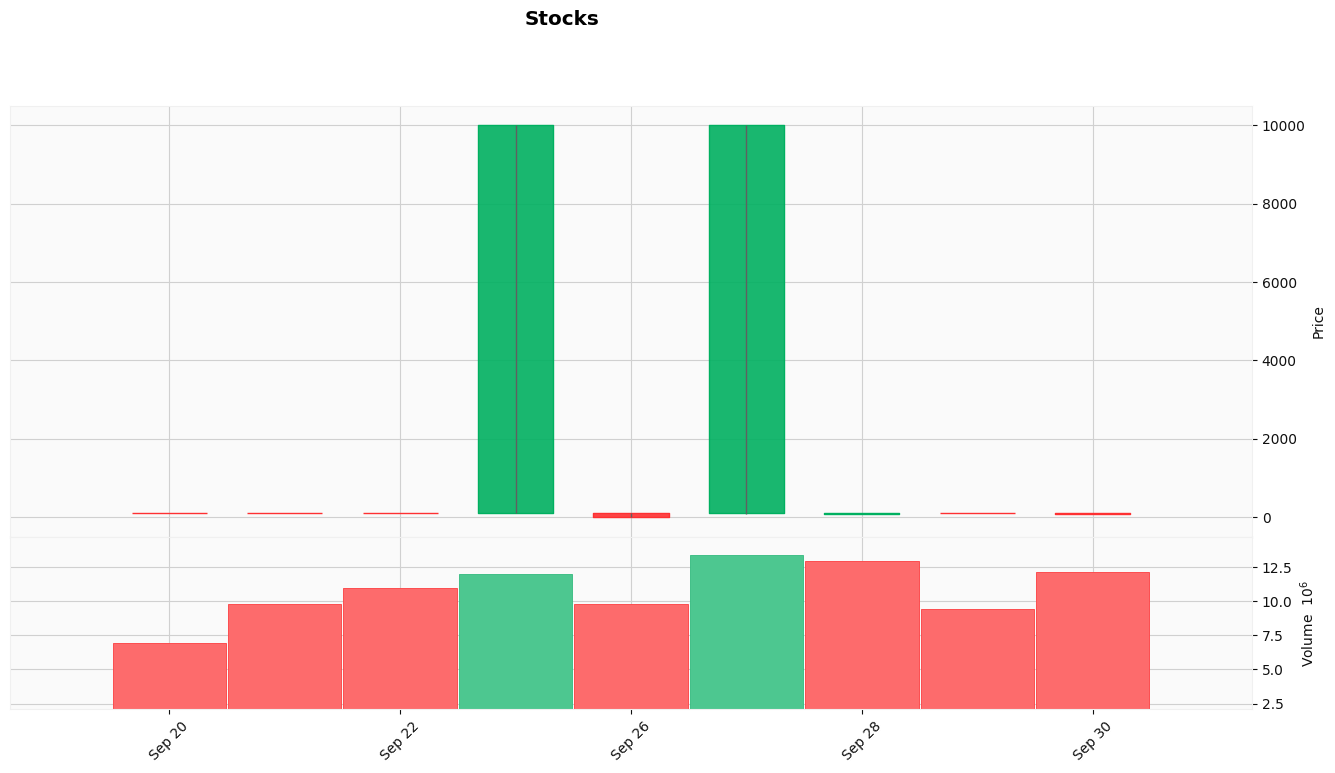

In [71]:
shortTime = df.loc[(df.index.month == 9) & (df.index.year == 2022) & (df.index.day >= 20) & (df.index.day <= 30)]

#shortTime

mpf.plot(shortTime, type='candle', volume=True, style='yahoo', title='Stocks', figratio=(20, 10), figscale=1.5)

In [72]:
shortTime

,Open,High,Low,Close,Volume,precentChangeOpen,precentChangeHigh,precentChangeLow,precentChangeClose,precentChangeVolume
Date,,,,,,,,,,
2022-09-20 00:00:00-04:00,107.928251,108.057833,106.512866,107.220558,6957400.0,1.006975,0.992584,0.998318,0.985344,0.871909
2022-09-21 00:00:00-04:00,107.041139,107.689029,104.150558,104.150558,9776400.0,0.991781,0.996587,0.977821,0.971367,1.405180
2022-09-22 00:00:00-04:00,103.871469,104.320011,101.688580,101.828133,10953400.0,0.970388,0.968715,0.976361,0.977701,1.120392
2022-09-23 00:00:00-04:00,100.293137,100.851316,97.701578,9999.000000,11976900.0,0.965550,0.966749,0.960792,98.194868,1.093441
2022-09-26 00:00:00-04:00,98.628560,100.333012,97.741452,0.000000,9760500.0,0.983403,0.994861,1.000408,0.000000,0.814944
2022-09-27 00:00:00-04:00,99.206673,99.316317,95.119994,9999.000000,13360200.0,1.005862,0.989867,0.973180,inf,1.368803
2022-09-28 00:00:00-04:00,95.478829,99.545577,95.139930,99.077103,12895500.0,0.962423,1.002308,1.000210,0.009909,0.965218
2022-09-29 00:00:00-04:00,98.209924,98.279696,95.917400,97.133430,9435100.0,1.028604,0.987283,1.008172,0.980382,0.731658
2022-09-30 00:00:00-04:00,96.186516,97.163336,93.973727,94.023567,12094900.0,0.979397,0.988641,0.979736,0.967984,1.281905


### problems in the data specifically
in the dates 23.9.22, 26.9.22, 27.9.22 has close values of 9999, 0, 9999

there are multiple exaturated time jumps in the data, but all of them can be explained by viewing the special days where the stock exchange doesnt run.

## Need to do

* handle outliers

#### handling outliers

In [87]:
# finding outliers limits
n = 2
df['precentChangeOpen'] = (df['Open']/df['Open'].shift(1)).fillna(0)
df['precentChangeHigh'] = (df['High']/df['High'].shift(1)).fillna(0)
df['precentChangeLow'] = (df['Low']/df['Low'].shift(1)).fillna(0)
df['precentChangeClose'] = (df['Close']/df['Close'].shift(1)).fillna(0)
df['precentChangeVolume'] = (df['Volume']/df['Volume'].shift(1)).fillna(0)

IQROpen = df['precentChangeOpen'].quantile(0.75) - df['precentChangeOpen'].quantile(0.25)
IQRHigh = df['precentChangeHigh'].quantile(0.75) - df['precentChangeHigh'].quantile(0.25)
IQRLow = df['precentChangeLow'].quantile(0.75) - df['precentChangeLow'].quantile(0.25)
IQRClose = df['precentChangeClose'].quantile(0.75) - df['precentChangeClose'].quantile(0.25)
IQRVolume = df['precentChangeVolume'].quantile(0.75) - df['precentChangeVolume'].quantile(0.25)

LowerBoundOpen = df['precentChangeOpen'].quantile(0.25) - (1.5 * IQROpen)
UpperBoundOpen = df['precentChangeOpen'].quantile(0.75) + (1.5 * IQROpen)
LowerBoundHigh = df['precentChangeHigh'].quantile(0.25) - (1.5 * IQRHigh)
UpperBoundHigh = df['precentChangeHigh'].quantile(0.75) + (1.5 * IQRHigh)
LowerBoundLow = df['precentChangeLow'].quantile(0.25) - (1.5 * IQRLow)
UpperBoundLow = df['precentChangeLow'].quantile(0.75) + (1.5 * IQRLow)
LowerBoundClose = df['precentChangeClose'].quantile(0.25) - (1.5 * IQRClose)
UpperBoundClose = df['precentChangeClose'].quantile(0.75) + (1.5 * IQRClose)
LowerBoundVolume = df['precentChangeVolume'].quantile(0.25) - (1.5 * IQRVolume)
UpperBoundVolume = df['precentChangeVolume'].quantile(0.75) + (1.5 * IQRVolume)


In [90]:
print(LowerBoundClose)
print(UpperBoundClose)
print(LowerBoundHigh)
print(UpperBoundHigh)
print(LowerBoundLow)
print(UpperBoundLow)
print(LowerBoundOpen)
print(UpperBoundOpen)
print(LowerBoundVolume)
print(UpperBoundVolume)

0.9543378653521991
1.0445124452202372
0.9583343627456611
1.0402089088634512
0.9605781532903399
1.0389858606581601
0.9533570777041125
1.0462815602491773
0.22989407265654027
1.7897860646080952


In [124]:
def find_outliers(df, column, window, upperPrecentile = 0.95, lowerPrecentile = 0.05):
    local_df = df.copy()
    local_df['IQR'] = local_df[column].rolling(window=window).quantile(upperPrecentile) - local_df[column].rolling(window=window).quantile(lowerPrecentile)
    local_df['LowerBound'] = local_df[column].rolling(window=window).quantile(lowerPrecentile) - (1.5 * local_df['IQR'])
    local_df['UpperBound'] = local_df[column].rolling(window=window).quantile(upperPrecentile) + (1.5 * local_df['IQR'])
    local_df['Outlier'] = (local_df[column] < local_df['LowerBound']) | (local_df[column] > local_df['UpperBound'])
    return local_df

#OpenOutliers = find_outliers(df, 'Open', 20)
#HighOutliers = find_outliers(df, 'High', 20)
#LowOutliers = find_outliers(df, 'Low', 20)
CloseOutliers = find_outliers(df, 'Close', 50)
#VolumeOutliers = find_outliers(df, 'Volume', 20)

#completeOutliers = CloseOutliers #| VolumeOutliers

CloseOutliers[CloseOutliers['Outlier']][['Close', 'LowerBound', 'UpperBound', 'IQR']]


,Close,LowerBound,UpperBound,IQR
Date,,,,
2022-09-23 00:00:00-04:00,9999.0,63.597730,158.970895,23.843291
2022-09-26 00:00:00-04:00,0.0,63.597730,158.970895,23.843291
2022-09-27 00:00:00-04:00,9999.0,64.948333,159.815139,23.716702
2023-05-01 00:00:00-04:00,-20.0,79.710709,114.728587,8.754469


In [88]:
print(f'{df['precentChangeOpen'][(df['precentChangeOpen'] > UpperBoundOpen) & (df['precentChangeOpen'] < LowerBoundOpen)].count()}')
print(f'{df['precentChangeHigh'][(df['precentChangeHigh'] > UpperBoundHigh) & (df['precentChangeHigh'] < LowerBoundHigh)].count()}')
print(f'{df['precentChangeLow'][(df['precentChangeLow'] > UpperBoundLow) & (df['precentChangeLow'] < LowerBoundLow)].count()}')
print(f'{df['precentChangeClose'][(df['precentChangeClose'] > UpperBoundClose) & (df['precentChangeClose'] < LowerBoundClose)].count()}')
print(f'{df['precentChangeVolume'][(df['precentChangeVolume'] > UpperBoundVolume) & (df['precentChangeVolume'] < LowerBoundVolume)].count()}')

0
0
0
0
0


In [127]:
df_cleaned = df[CloseOutliers['Outlier']==False]

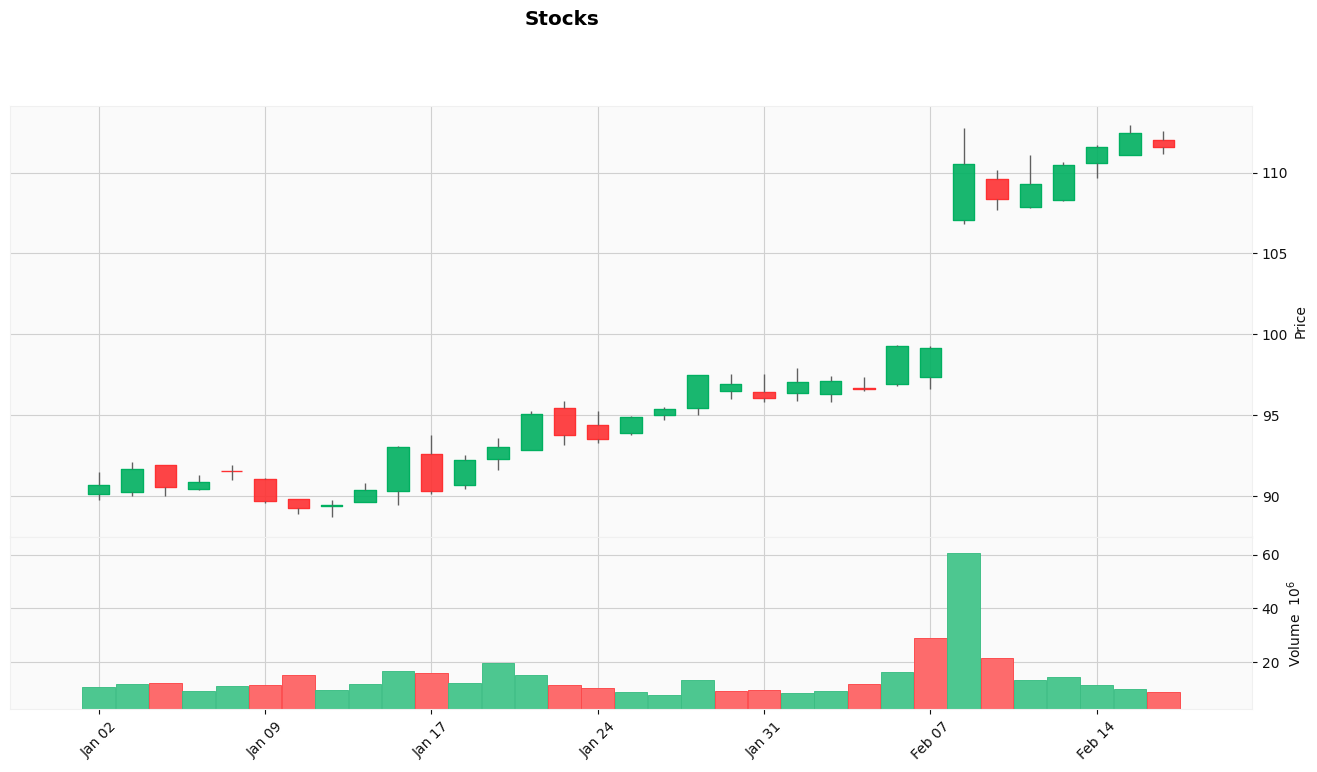

In [130]:
mpf.plot(df_cleaned[df_cleaned.index.year == 2024], type='candle', volume=True, style='yahoo', title='Stocks', figratio=(20, 10), figscale=1.5)

no outliers

# part 2

### indicators used in indian scammer video, explained

##### UT Bot Indicator key features and introduction

UT Bot is a versatile and customisable technical indicator designed to cater to various trading styles, including scalping, intraday, and swing trading. The UT Bot indicator analyses current market conditions in real time using algorithmic calculations and provides insightful, actionable trading signals. Offering an adaptable framework, the UT Bot enables traders to fine-tune their strategies in alignment with their preferred risk tolerance, time horizon, and investment objectives.

– Real-time signals: UT Bot’s logic provides real-time entry and exit signals, helping traders identify potential trade opportunities in the market.

– Adaptive framework: UT Bot allows traders to customise the indicator parameters to suit their trading styles and objectives.

– Compatible with multiple assets: Traders can utilise UT Bot for various financial instruments, including stocks, forex, futures, and cryptocurrencies.

– Wide applicability: The UT Bot’s flexibility enables its effective application in diverse trading strategies, ranging from scalping to long-term trading.

To enhance the UT Bot indicator’s efficiency, it is recommended to incorporate additional technical analysis tools and chart patterns into the decision-making process.

Uses Moving Avrage (MA): to identify overall trend in the market

Uses Average True Range (ATR): is used as a trailing stop loss (ATR_TSL)

Buy Signal: close price is higher than the ATR and the EMA is over the ATR

Sell Signal: close price is lower than the ATR and the EMA is under the ATR

##### STC Indicator (Schaff Trend Cycle) key features and introduction

The Schaff Trend Cycle (STC) is a unique technical indicator developed by Doug Schaff. STC combines elements of both trend-following and oscillator indicators, resulting in a versatile tool that aims to identify market trends and potential reversals with greater precision and timeliness than traditional indicators.

Calculating the Schaff Trend Cycle
The Schaff Trend Cycle calculation involves a four-step process:

1. Calculate the 23-period Exponential Moving Average (EMA) of the instrument’s closing prices.

2. Calculate the 50-period EMA of the instrument’s closing prices.

3. Compute the absolute difference between the 23-period and 50-period EMAs.

4. Apply the Stochastic oscillator formula to the difference values, combining it with a cycle component (default: 10-period) to obtain the STC curve.

Interpreting the Schaff Trend Cycle
The STC oscillates in a range between 0 and 100, with values above 25 and below 75 considered “inner bounds”. The interpretation of the Schaff Trend Cycle values is as follows:

– When the STC line crosses above the 25 level, it may signal a potential bullish trend, indicating a potential long entry or short exit opportunity.

– When the STC line crosses below the 75 level, it could suggest a potential bearish trend, signifying a potential short entry or long exit opportunity.

While the Schaff Trend Cycle offers insightful trend signals, it is essential to corroborate these with additional technical indicators and chart patterns before executing trades.

STC calculation as follows:

1. calculate the 23-period and the 50-period exponential Moving Average (EMA) of the closing price:
* EMA_23 = EMA(Close, Short Length = 23)
* EMA_50 = EMA(Close, Short Length = 50)
2. Determine tha MACD Value:
* MACD = EMA_23 - EMA_50
3. Calcuate the 10-period Stochastic value from the MACD values:
* STC = 100 * (MACD - %K(MACD))/(%D(MACD) - %K(MACD))

%K(MACD) - lowest in range
%D(MACD) - highest in range

In [22]:


def make_api_call(base_url, endpoint="", method="GET", **kwargs):
    # Construct the full URL
    full_url = f'{base_url}{endpoint}'

    # Make the API call
    response = requests.request(method=method, url=full_url, **kwargs)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        return response
    else:
        # If the request was not successful, raise an exception with the error message
        raise Exception(f'API request failed with status code {response.status_code}: {response.text}')

In [23]:
base_url = 'https://fapi.binance.com'
method = 'GET'
endpoint = '/fapi/v1/time'
response = make_api_call(base_url, endpoint, method).json()
response

{'serverTime': 1709369253480}

In [24]:


# generalize this part!!!!

# extract server timestamp
server_time = response['serverTime']

# convert timestamp to regular date
date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)
date_string = date.strftime("%Y-%m-%d %H:%M:%S %Z")
print(f'server_time as timestamp: {int(server_time) / 1000.0}, date: {date_string}')

# convert timestamp to Asia/Jerusalem
utc_date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)
jer_tz= pytz.timezone('Asia/Jerusalem')
date_in_jer= utc_date.replace(tzinfo=pytz.utc).astimezone(jer_tz)
date_string_jer = date_in_jer.strftime("%Y-%m-%d %H:%M:%S %Z")
print(f'server_time as timestamp: {int(server_time) / 1000.0}, date in Asia/Jerusalem: {date_string_jer}')

# move one week earlier
week_before = date - datetime.timedelta(weeks=1)
week_before_date_string = week_before.strftime("%Y-%m-%d %H:%M:%S UTC")
print(f'One week before as timestamp {week_before.timestamp()}, date: {week_before_date_string}')

server_time as timestamp: 1709369253.48, date: 2024-03-02 08:47:33 
server_time as timestamp: 1709369253.48, date in Asia/Jerusalem: 2024-03-02 10:47:33 IST
One week before as timestamp 1708757253.48, date: 2024-02-24 08:47:33 UTC


C:\Users\tomge\AppData\Local\Temp\ipykernel_33184\2902868958.py:10: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)
C:\Users\tomge\AppData\Local\Temp\ipykernel_33184\2902868958.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  utc_date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)


In [62]:
def get_binance_historical_data(symbol, interval, start_date, end_date):
    
    # define basic parameters for call
    base_url = 'https://fapi.binance.com'
    endpoint = '/fapi/v1/klines'
    method = 'GET'
    
    # Set the start time parameter in the params dictionary
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': 1500,
        'startTime': start_date, # Start time in milliseconds
        'endTime': end_date # end time in milliseconds
    }


    # Make initial API call to get candles
    response = make_api_call(base_url, endpoint=endpoint, method=method, params=params)
    
    # initalize candles data
    candles_data = []

    # Append the received candles to the list
    candles_data.extend(response.json())

    # Update the start time for the next API call
    params['startTime'] = candles_data[-1][0] + 1 # last candle open_time + 1ms    

    while len(response.json()) > 0:
        # Make the next API call
        response = make_api_call(base_url, endpoint=endpoint, method=method, params=params)

        # Append the received candles to the list
        candles_data.extend(response.json())

        # Update the start time for the next API call
        params['startTime'] = candles_data[-1][0] + 1 # last candle open_time + 1ms
        
        if params['startTime'] > params['endTime']:
            break

            

    
    # Wrap the candles data as a pandas DataFrame
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume',
               'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    dtype={
    'open_time': 'datetime64[ms, Asia/Jerusalem]',
    'open': 'float64',
    'high': 'float64',
    'low': 'float64',
    'close': 'float64',
    'volume': 'float64',
    'close_time': 'datetime64[ms, Asia/Jerusalem]',
    'quote_asset_volume': 'float64',
    'number_of_trades': 'int64',
    'taker_buy_base_asset_volume': 'float64',
    'taker_buy_quote_asset_volume': 'float64',
    'ignore': 'float64'
    }
    
    df = pd.DataFrame(candles_data, columns=columns)
    df = df.astype(dtype)

    return df

In [61]:
# specific endpoint and method
symbol = 'BTCUSDT'
endpoint = '/fapi/v1/klines'
start_date = int(datetime.datetime(year=2023, month=1, day=1).timestamp() * 1000)
end_date = int(datetime.datetime(year=2024, month=1, day=1).timestamp() * 1000)

# make call
btcusdt_df = get_binance_historical_data(symbol, '30m', start_date, end_date)
btcusdt_df

1675222200001
1677922200001
1680622200001
1683322200001
1686022200001
1688722200001
1691422200001
1694122200001
1696822200001
1699522200001
1702222200001


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-01-01 00:00:00+02:00,16544.0,16565.1,16496.0,16540.7,7737.533,2023-01-01 00:29:59.999000+02:00,1.279086e+08,35451,3338.726,5.520766e+07,0.0
1,2023-01-01 00:30:00+02:00,16540.8,16550.8,16461.8,16515.1,8929.034,2023-01-01 00:59:59.999000+02:00,1.473757e+08,41907,3740.250,6.174233e+07,0.0
2,2023-01-01 01:00:00+02:00,16515.1,16524.6,16483.1,16520.9,5215.713,2023-01-01 01:29:59.999000+02:00,8.608995e+07,27411,2761.688,4.558437e+07,0.0
3,2023-01-01 01:30:00+02:00,16520.9,16546.9,16516.5,16537.6,3127.373,2023-01-01 01:59:59.999000+02:00,5.171514e+07,17078,1772.384,2.930818e+07,0.0
4,2023-01-01 02:00:00+02:00,16537.5,16540.9,16513.4,16539.4,2832.734,2023-01-01 02:29:59.999000+02:00,4.681919e+07,16561,1373.220,2.269722e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17516,2023-12-31 22:00:00+02:00,42659.9,42724.5,42600.0,42627.2,2559.181,2023-12-31 22:29:59.999000+02:00,1.091479e+08,28539,1367.677,5.833755e+07,0.0
17517,2023-12-31 22:30:00+02:00,42627.2,42662.5,42543.3,42599.1,2171.755,2023-12-31 22:59:59.999000+02:00,9.251599e+07,27578,1098.223,4.678832e+07,0.0
17518,2023-12-31 23:00:00+02:00,42599.2,42717.0,42586.7,42674.8,1468.758,2023-12-31 23:29:59.999000+02:00,6.265517e+07,20273,862.639,3.679818e+07,0.0
17519,2023-12-31 23:30:00+02:00,42674.8,42689.1,42558.2,42558.9,2325.252,2023-12-31 23:59:59.999000+02:00,9.909701e+07,24200,1099.718,4.687127e+07,0.0
